In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import pandas as pd
from matplotlib import rcParams,font_manager
from matplotlib.colors import ListedColormap

from fourinarowfunctions import *

datadir = "../data/"

In [2]:
#name of your data file
filename = datadir + 'trialdata.csv'
data_dict = load_data(filename, False)
parsed_dict = {}
for username, data in data_dict.items():
    try:
        parsed_dict[username] = get_parsed_data(data, username)
    except AssertionError as e:
        continue
usernames = parsed_dict.keys()
print(f"{len(usernames)} users with complete data")

user A242:R_ymscU32j53VKwil started games after completing the task. Using only the first 37 games
159 users with complete data


In [3]:
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size']

username2studyid = {username: username.split(":")[0] for username in usernames}
username2psiturkid = {username: username.split(":")[1] for username in usernames}

Users that have the same StudyID

Should be empty

In [4]:
duplicates = pd.DataFrame(username2studyid.items(), columns=["username", "StudyID"])
duplicates[duplicates["StudyID"].duplicated(keep=False)]

,username,StudyID
93,866:R_1gV06gSb8WYiLyG,866
111,866:R_31YEgt5MqfcfZMC,866


In [5]:
age = pd.read_csv(datadir + "SubjectAge.csv")
pwm = pd.read_csv(datadir + "params_with_metrics.csv")
dur = pd.read_csv(datadir + "gameDurations.csv")
rts = pd.read_csv(datadir + "reactiontimes.csv")

bins = [7, 12, 18, 24]
ageBinrNr2Value = {0: 10, 1: 15, 2:21}
age['ageBin'] = pd.cut(age['FlooredAge'], bins)
age['ageBinNr'] = age['ageBin'].cat.codes
age['ageBinValue'] = age.apply(lambda row: ageBinrNr2Value.get(row['ageBinNr'], 0), axis = 1)
dur["MainDurationMinutes"] = pd.to_numeric(dur["MainDurationSeconds"]) / 60
dur["TotalDurationMinutes"] = pd.to_numeric(dur["TotalDurationSeconds"], errors='coerce') / 60
dur["StudyID"] = dur["User"].apply(lambda x: username2studyid[x])
rts["TotalMoves"] = rts["UserMoves"] + rts["OpponentMoves"]
rts["StudyID"] = rts["User"].apply(lambda x: username2studyid[x])
raw_metrics = pwm.loc[:,("subject", "fold", "planning depth", "feature drop rate", "heuristic quality", "elo")]
raw_metrics["StudyID"] = raw_metrics["subject"].apply(lambda x: username2studyid[x])
raw_metrics = pd.merge(raw_metrics, age, on="StudyID", how="left")
metrics = raw_metrics.dropna()
dropped_nans = raw_metrics[~raw_metrics.index.isin(metrics.index)]
print(f"Dropped rows with nans: {len(dropped_nans)}")
dropped_nans

Dropped rows with nans: 40


,subject,fold,planning depth,feature drop rate,heuristic quality,elo,StudyID,DoB,Gender,ExactAge,FlooredAge,TaskDate,ageBin,ageBinNr,ageBinValue
550,A1052:R_787p5urRmH36oyR,1,2.887800,0.238720,0.505799,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
551,A1052:R_787p5urRmH36oyR,2,0.936118,0.290540,0.544204,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
552,A1052:R_787p5urRmH36oyR,3,4.837180,0.197350,0.560637,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
553,A1052:R_787p5urRmH36oyR,4,3.622580,0.264520,0.632957,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
554,A1052:R_787p5urRmH36oyR,5,8.784040,0.184830,0.608669,222,A1052,12-7-1995,M,25.6466,25.0,26-2-2021,NaN,-1.0,0.0
615,A1153:R_1CwnNA5xXOlHq5l,1,2.339580,0.314790,0.368033,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
616,A1153:R_1CwnNA5xXOlHq5l,2,0.028949,0.363200,0.406567,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,A1153:R_1CwnNA5xXOlHq5l,3,4.799050,0.495570,0.238351,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,A1153:R_1CwnNA5xXOlHq5l,4,9.922640,0.494040,0.453293,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,A1153:R_1CwnNA5xXOlHq5l,5,0.003521,0.402960,0.380365,-116,A1153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
age_colors = ['#7DE3AC', '#129951','#20382B']
age_labels = ["8 to 12","13 to 17","18 to 24"]

rcParams['figure.figsize'] = (8,6) #figure size in inches

def set_labels(ax, title, reposition_ticks = True):
    ax.set_xlabel("Age")
    ax.set_ylabel(title)
    labels = age_labels.copy()
    if reposition_ticks:
        ax.set_xticks(list(ageBinrNr2Value.values()))
    ax.set_xticklabels(labels)
    ax.legend([])
    return ax

def plot_with_errorbars(col, title, df = None):
    if not isinstance(df, pd.DataFrame):
        df = metrics.groupby("subject").mean().reset_index()
    ax = df.groupby("ageBinValue")[col].aggregate(['mean', 'sem']).plot(yerr="sem", color='k')
    size = 20
    df.plot.scatter('ExactAge', col, size, [age_colors[int(binNr)] for binNr in df['ageBinNr']], ax=ax)
    size = 300
    df.groupby("ageBinValue")[col].aggregate(['mean']).reset_index().plot.scatter('ageBinValue', 'mean', size, age_colors, ax=ax)
    print(f"{len(df.dropna(subset=[col]))} rows used in this graph")
    set_labels(ax, title)

151 rows used in this graph


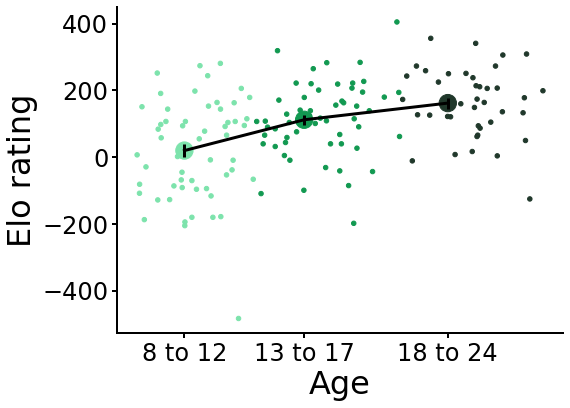

In [7]:
plot_with_errorbars("elo", "Elo rating")

151 rows used in this graph


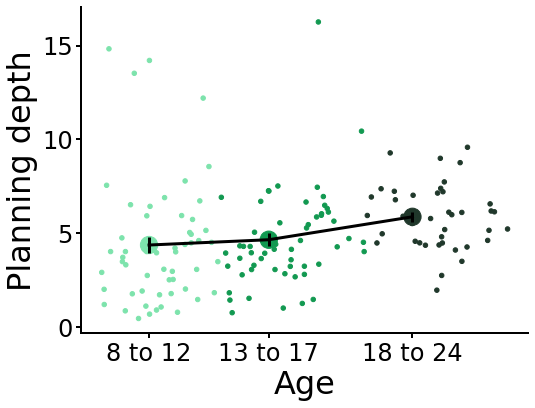

In [8]:
plot_with_errorbars("planning depth", "Planning depth")

151 rows used in this graph


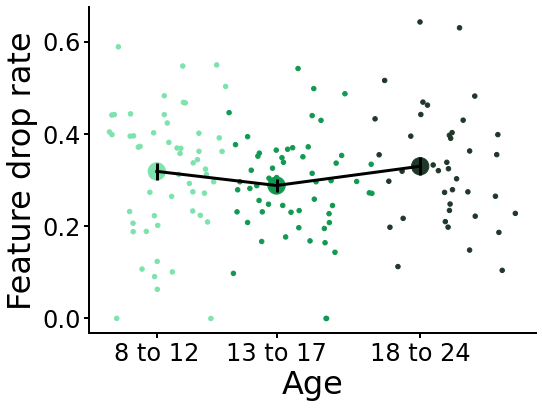

In [9]:
plot_with_errorbars("feature drop rate", "Feature drop rate")

151 rows used in this graph


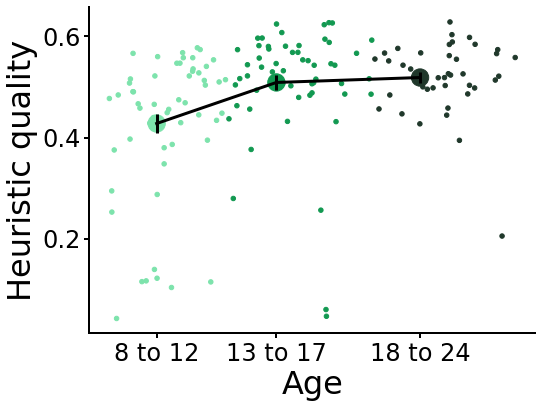

In [10]:
plot_with_errorbars("heuristic quality", "Heuristic quality")

In [11]:
durage = pd.merge(dur, age, how="left", on="StudyID")
print(f"Subjects in data: {len(durage)}")
# only include subjects listed in the first cell
durage = durage[durage["User"].isin(usernames)]
print(f"Subjects after selection: {len(durage)}")
# Remove duplicate subjects. Duplicates creep in if on or both of params_with_metrics or the age csv's contains duplicates
durage = durage.drop_duplicates(subset=["User"], keep="first")
print(f"Subjects after filtering duplicates: {len(durage)}")
# Drop subjects for which no age was available. Check that you have the expected number of subjects left!
durage = durage.dropna(subset=["ageBin"])
print(f"Subjects with age bin: {len(durage)}")

Subjects in data: 159
Subjects after selection: 159
Subjects after filtering duplicates: 159
Subjects with age bin: 151


In [12]:
rcParams['figure.figsize'] = (6,6) #figure size in inches

def plot_freq(col, title):
    plotdata = durage.groupby("ageBin")[col].aggregate(['mean', 'sem'])
    ax = plotdata.plot(kind="bar", yerr="sem", color=[age_colors])
    set_labels(ax, title, False).tick_params("x", labelrotation=0)

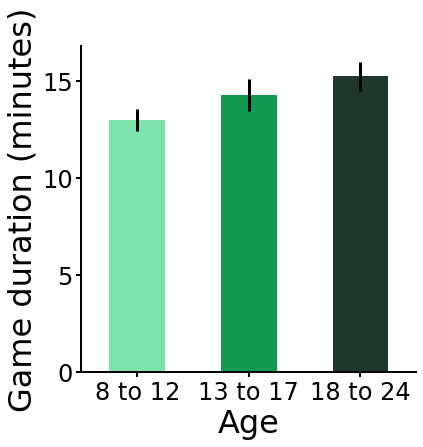

In [13]:
plot_freq("MainDurationMinutes", "Game duration (minutes)")

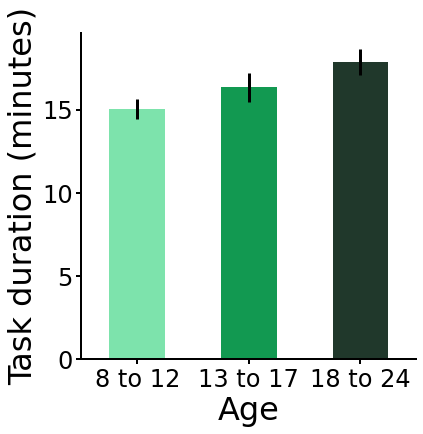

In [14]:
plot_freq("TotalDurationMinutes", "Task duration (minutes)")

In [15]:
plotdata = pd.merge(rts, age, on="StudyID", how="left")[["User", "GameNr", "TotalMoves", "ageBinNr"]].drop_duplicates()
plotdata = plotdata[plotdata["ageBinNr"] >= 0]
plotdata["count"] = 1
plotdata = plotdata.groupby(["ageBinNr", "TotalMoves"])["count"].sum().reset_index().pivot(index="TotalMoves",columns="ageBinNr").fillna(0)
plotdata.loc[37] = 0 # Add an empty value at the end (36 moves is a full board)
plotdata = plotdata.sort_index()

subsPerBin = metrics[["subject", "ageBinNr"]].drop_duplicates().groupby("ageBinNr").count()
for binNr in range(len(bins) - 1):
    plotdata.iloc[:,binNr] = plotdata.iloc[:,binNr] / subsPerBin.iloc[binNr,0]

plotdata

count                 
ageBinNr         0.0       1.0    2.0
TotalMoves                           
7           7.727273  7.107143  6.225
8           4.490909  4.160714  3.700
9           2.527273  2.625000  2.650
10          2.109091  2.428571  2.125
11          2.818182  2.767857  3.575
12          1.745455  2.178571  2.450
13          1.909091  2.375000  2.275
14          1.981818  1.732143  2.000
15          1.709091  1.589286  1.450
16          1.127273  1.285714  0.950
17          1.109091  1.267857  1.275
18          0.800000  0.714286  1.125
19          0.690909  0.785714  0.600
20          0.545455  0.571429  0.700
21          0.436364  0.482143  0.625
22          0.309091  0.410714  0.475
23          0.381818  0.267857  0.375
24          0.290909  0.214286  0.225
25          0.327273  0.303571  0.300
26          0.145455  0.214286  0.100
27          0.254545  0.125000  0.175
28          0.109091  0.089286  0.225
29          0.145455  0.142857  0.125
30          0.127273  0.017857  0.025
31          0.036364  0.017857  0.000
32          0.054545  0.035714  0.175
33          0.054545  0.035714  0.025
34          0.109091  0.000000  0.025
35          0.018182  0.000000  0.025
36          0.909091  1.000000  0.975
37          0.000000  0.000000  0.000

Text(0, 0.5, 'Average frequency')

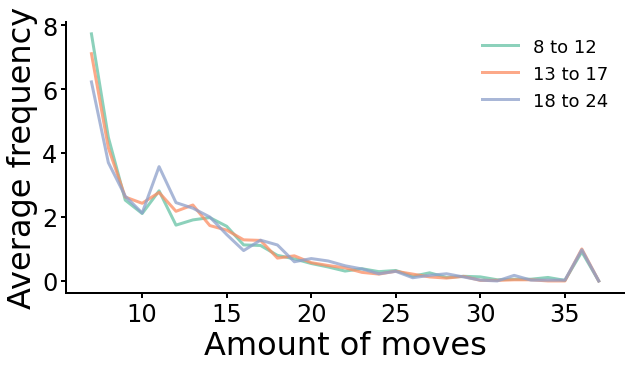

In [16]:
ax = plotdata.plot(color=["#66C2A5C0", "#FC8D62C0", "#8DA0CBC0"], figsize=(10, 5))
ax.legend(age_labels)
ax.set_xlabel("Amount of moves")
ax.set_ylabel("Average frequency")